In [153]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Remember to install sklearn with
# pip install -U scikit-learn
import sklearn

Cleaned of building_id, manager_id, photos columns.
<br></br>
Cleaned of latitude, longitude, and price outliers.
<br></br>
<b>Use this formula for multi-class logarithmic loss:</b>
<br></br>
https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/overview/evaluation 

In [52]:
df = pd.read_json('cleaned_train.json')
#df.head()

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
<br></br>
Need to split features into feature variables (independent) and target variables (dependent)

In [164]:
#Features, need to drop non-numerical columns
#can use .unique() function for better modelling
features_for_logreg = ['bathrooms','bedrooms','latitude','longitude','listing_id','price','Special Characters','Numbers','StopWord','Uppercase']
df_x = df[features_for_logreg]

#Target
df_y = df['interest_level']

In [134]:
#CAN IMPROVE ACCURACY WITH K NEAREST NEIGHBOURS, CUTTING DOWN NUMBER OF ENTRIES
#https://www.ritchieng.com/machine-learning-cross-validation/
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn import datasets

In [135]:
#clf = LogisticRegressionCV(cv=5,random_state=0).fit(df_x,df_y)

In [136]:
prediction = cross_val_predict(LogisticRegression(),df_x,df_y,cv=5)

In [137]:
print(metrics.accuracy_score(df_y,prediction))
print(metrics.classification_report(df_y,prediction,zero_division='warn'))

0.6929915784751535


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00      3836
         low       0.69      1.00      0.82     33987
      medium       0.00      0.00      0.00     11218

    accuracy                           0.69     49041
   macro avg       0.23      0.33      0.27     49041
weighted avg       0.48      0.69      0.57     49041



In [141]:
scores = cross_val_score(LogisticRegression(),df_x,df_y,cv=5,scoring='accuracy')
print(scores)

[0.69293506 0.69300571 0.69290375 0.69300571 0.69310767]


In [142]:
print(scores.mean())

0.6929915796276582


In [146]:
predict = cross_val_predict(LogisticRegression(),df_x,df_y,cv=5)
print(predict)

['low' 'low' 'low' ... 'low' 'low' 'low']


In [147]:
#DATACAMP TUTORIAL

In [169]:
#x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.25,random_state=0)
logreg=LogisticRegression()
#logreg.fit(x_train,y_train)
#y_pred=logreg.predict(x_test)
predict = cross_val_predict(logreg,df_x,df_y,cv=5)
predict.shape
confusion_matrix = metrics.confusion_matrix(df_y,predict)
confusion_matrix

array([[    0,  3836,     0],
       [    0, 33985,     2],
       [    0, 11218,     0]])

Text(0.5, 257.44, 'Predicted label')

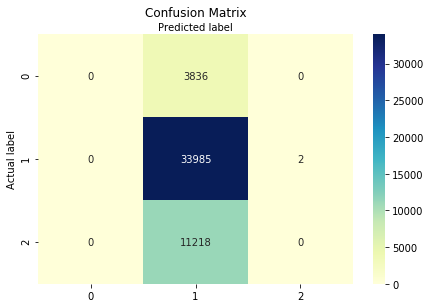

In [173]:
class_names=['low','medium','high']
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [172]:
print("Accuracy:",metrics.accuracy_score(df_y, predict))
print("Precision:",metrics.precision_score(df_y, predict,average='micro'))
print("Recall:",metrics.recall_score(df_y, predict,average='micro'))

Accuracy: 0.6929915784751535
Precision: 0.6929915784751535
Recall: 0.6929915784751535
